# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [7]:
data['DiabetesPedigreeFunction']
# should we drop this... not sure what it is based on,
    # run some linear regression to see if the r2 is 1 or smthg 

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [8]:
data_x = data.drop('Outcome',axis=1)

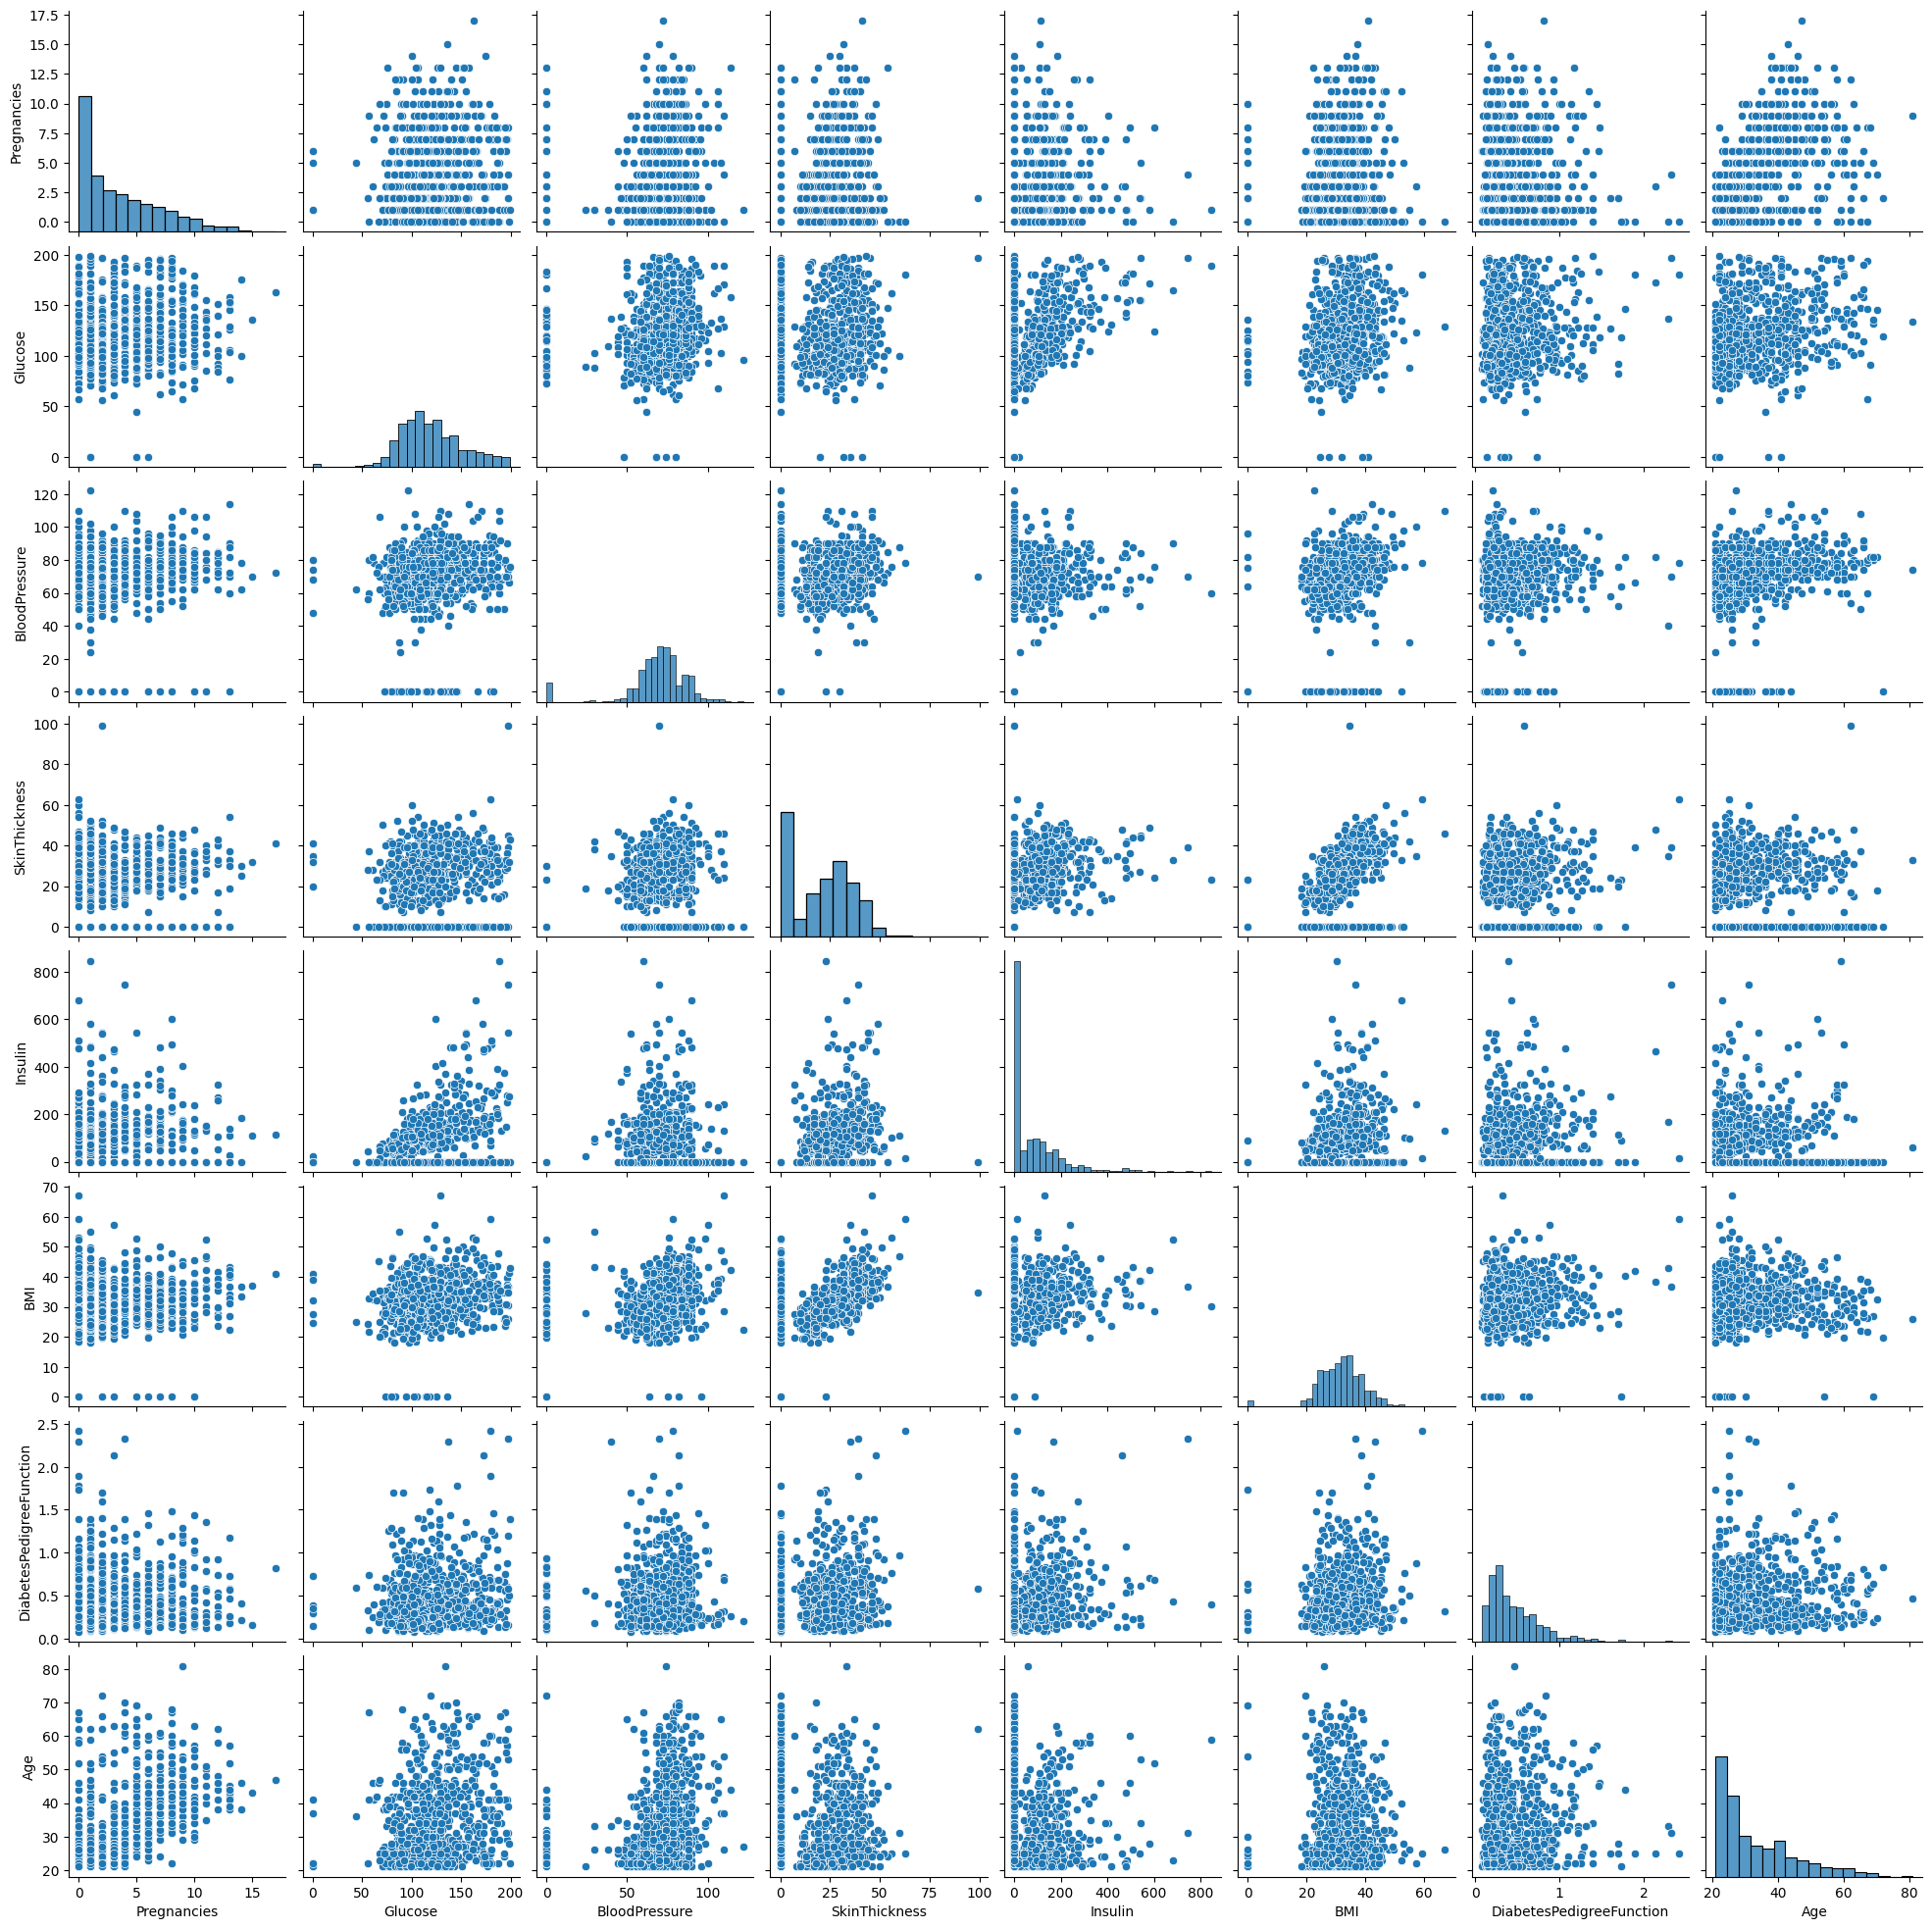

In [9]:
sns.pairplot(data_x)
plt.show()

<Figure size 640x480 with 0 Axes>

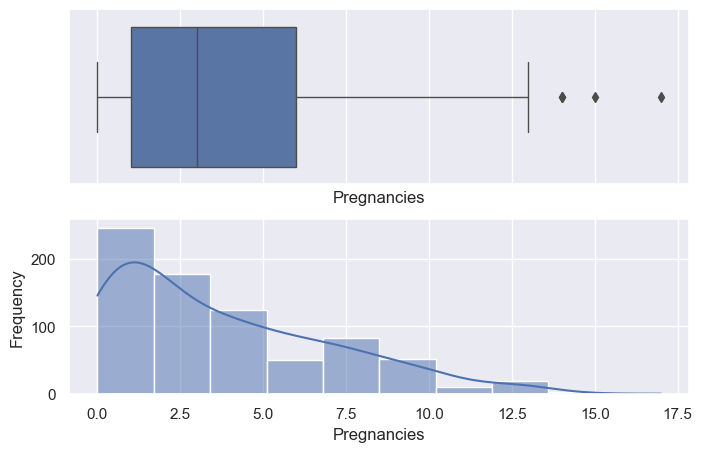

<Figure size 800x500 with 0 Axes>

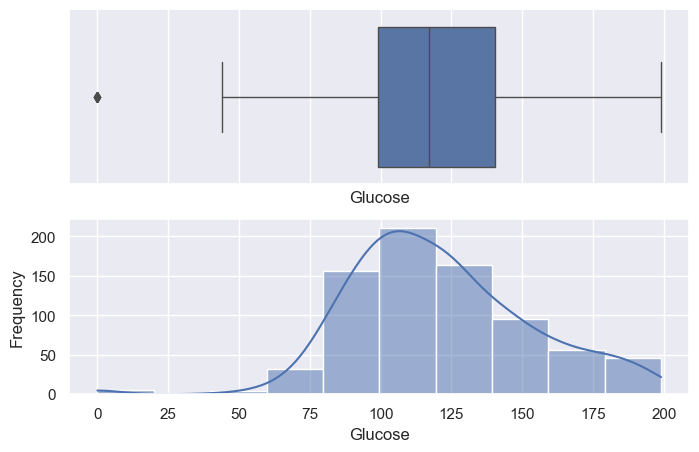

<Figure size 800x500 with 0 Axes>

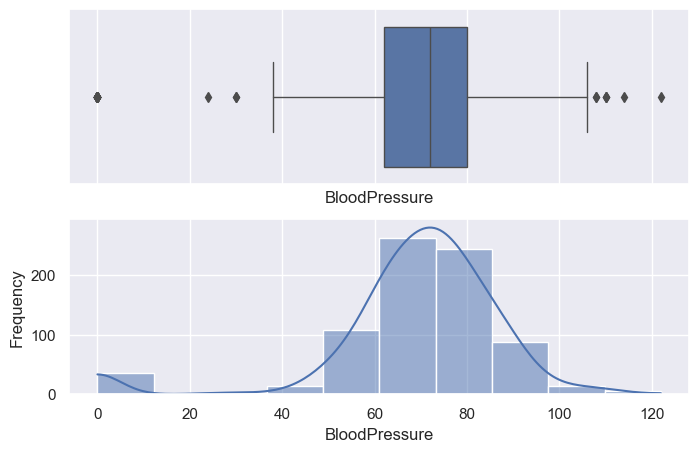

<Figure size 800x500 with 0 Axes>

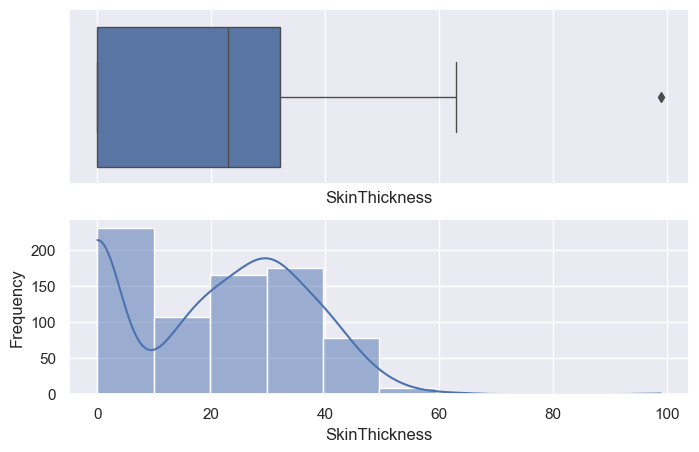

<Figure size 800x500 with 0 Axes>

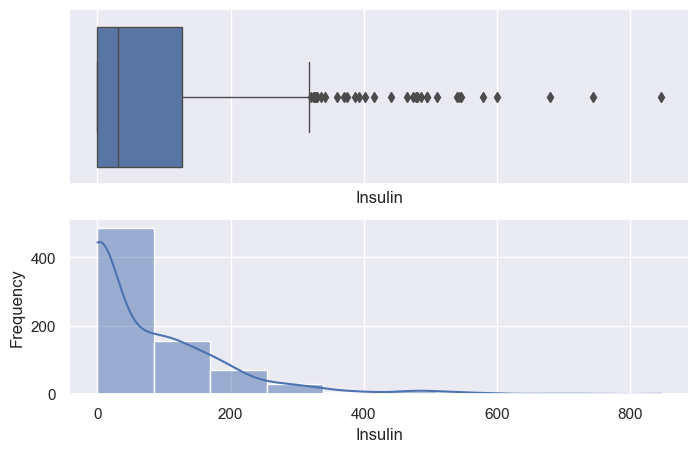

<Figure size 800x500 with 0 Axes>

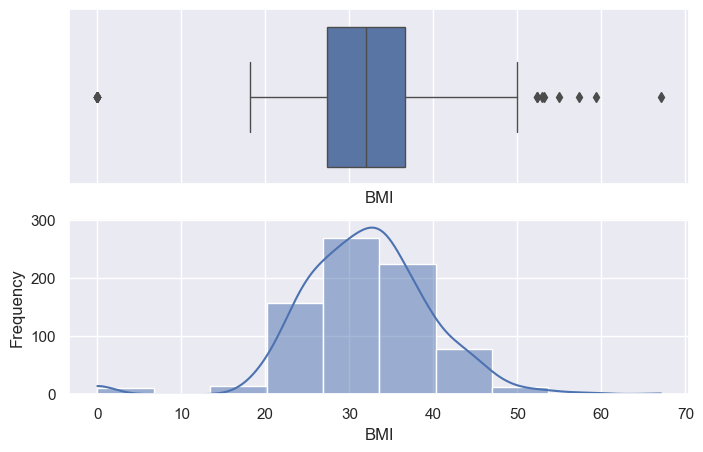

<Figure size 800x500 with 0 Axes>

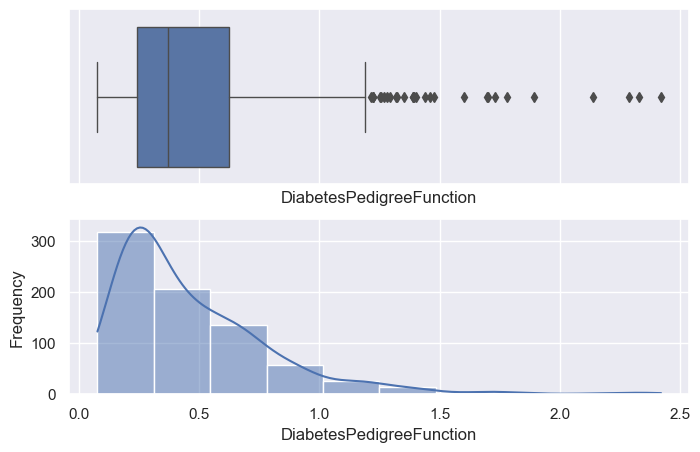

<Figure size 800x500 with 0 Axes>

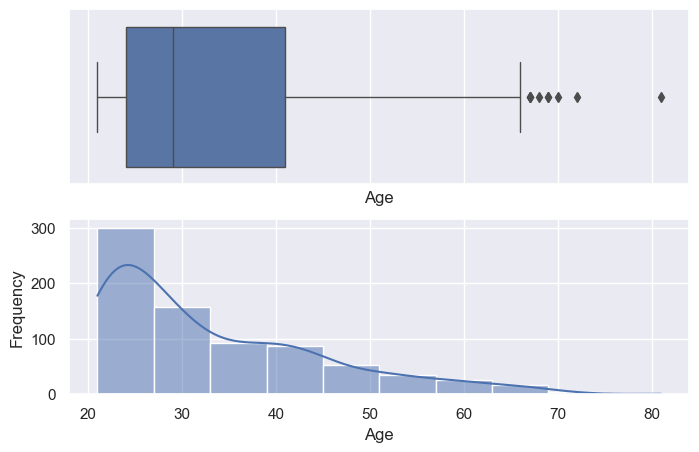

In [10]:
for i in data_x.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=data_x[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(data_x[i], ax=ax_hist , bins = 10,kde=True)

In [11]:
# most columns do not look very normalized and contain some or many outliers
# let's evaluate if removing the outliers would greatly impact the size of the data set

In [12]:
#check for zeroes
for i in data_x.columns:
    n = data_x[data_x[i] == 0].shape[0]
    print(f"total where {i} is zero: {n}")

total where Pregnancies is zero: 111
total where Glucose is zero: 5
total where BloodPressure is zero: 35
total where SkinThickness is zero: 227
total where Insulin is zero: 374
total where BMI is zero: 11
total where DiabetesPedigreeFunction is zero: 0
total where Age is zero: 0


In [13]:
# We expect zeros in Pregnancies, since many people have not ever been pregnant.
# removing rows with zeros from SkinThickness and Insulin would impact the dataset a lot, removing 25-35% of the data, 
# we should maybe look at running this twice, once with those rows and once without.
# However, as seen in the huge pair plot above, the zeros in BP, Glucose and BMI should never be zero, and those results could throw off our model, 
    # plus, since there are relatively few other those, removing them will have only a little impact on the size of our data
data_clean = data.loc[(data['Glucose']!=0)&(data['BloodPressure']!=0)&(data['BMI']!=0)]
data_clean.reset_index()
print(data.shape)
print(data_clean.shape)

(768, 9)
(724, 9)


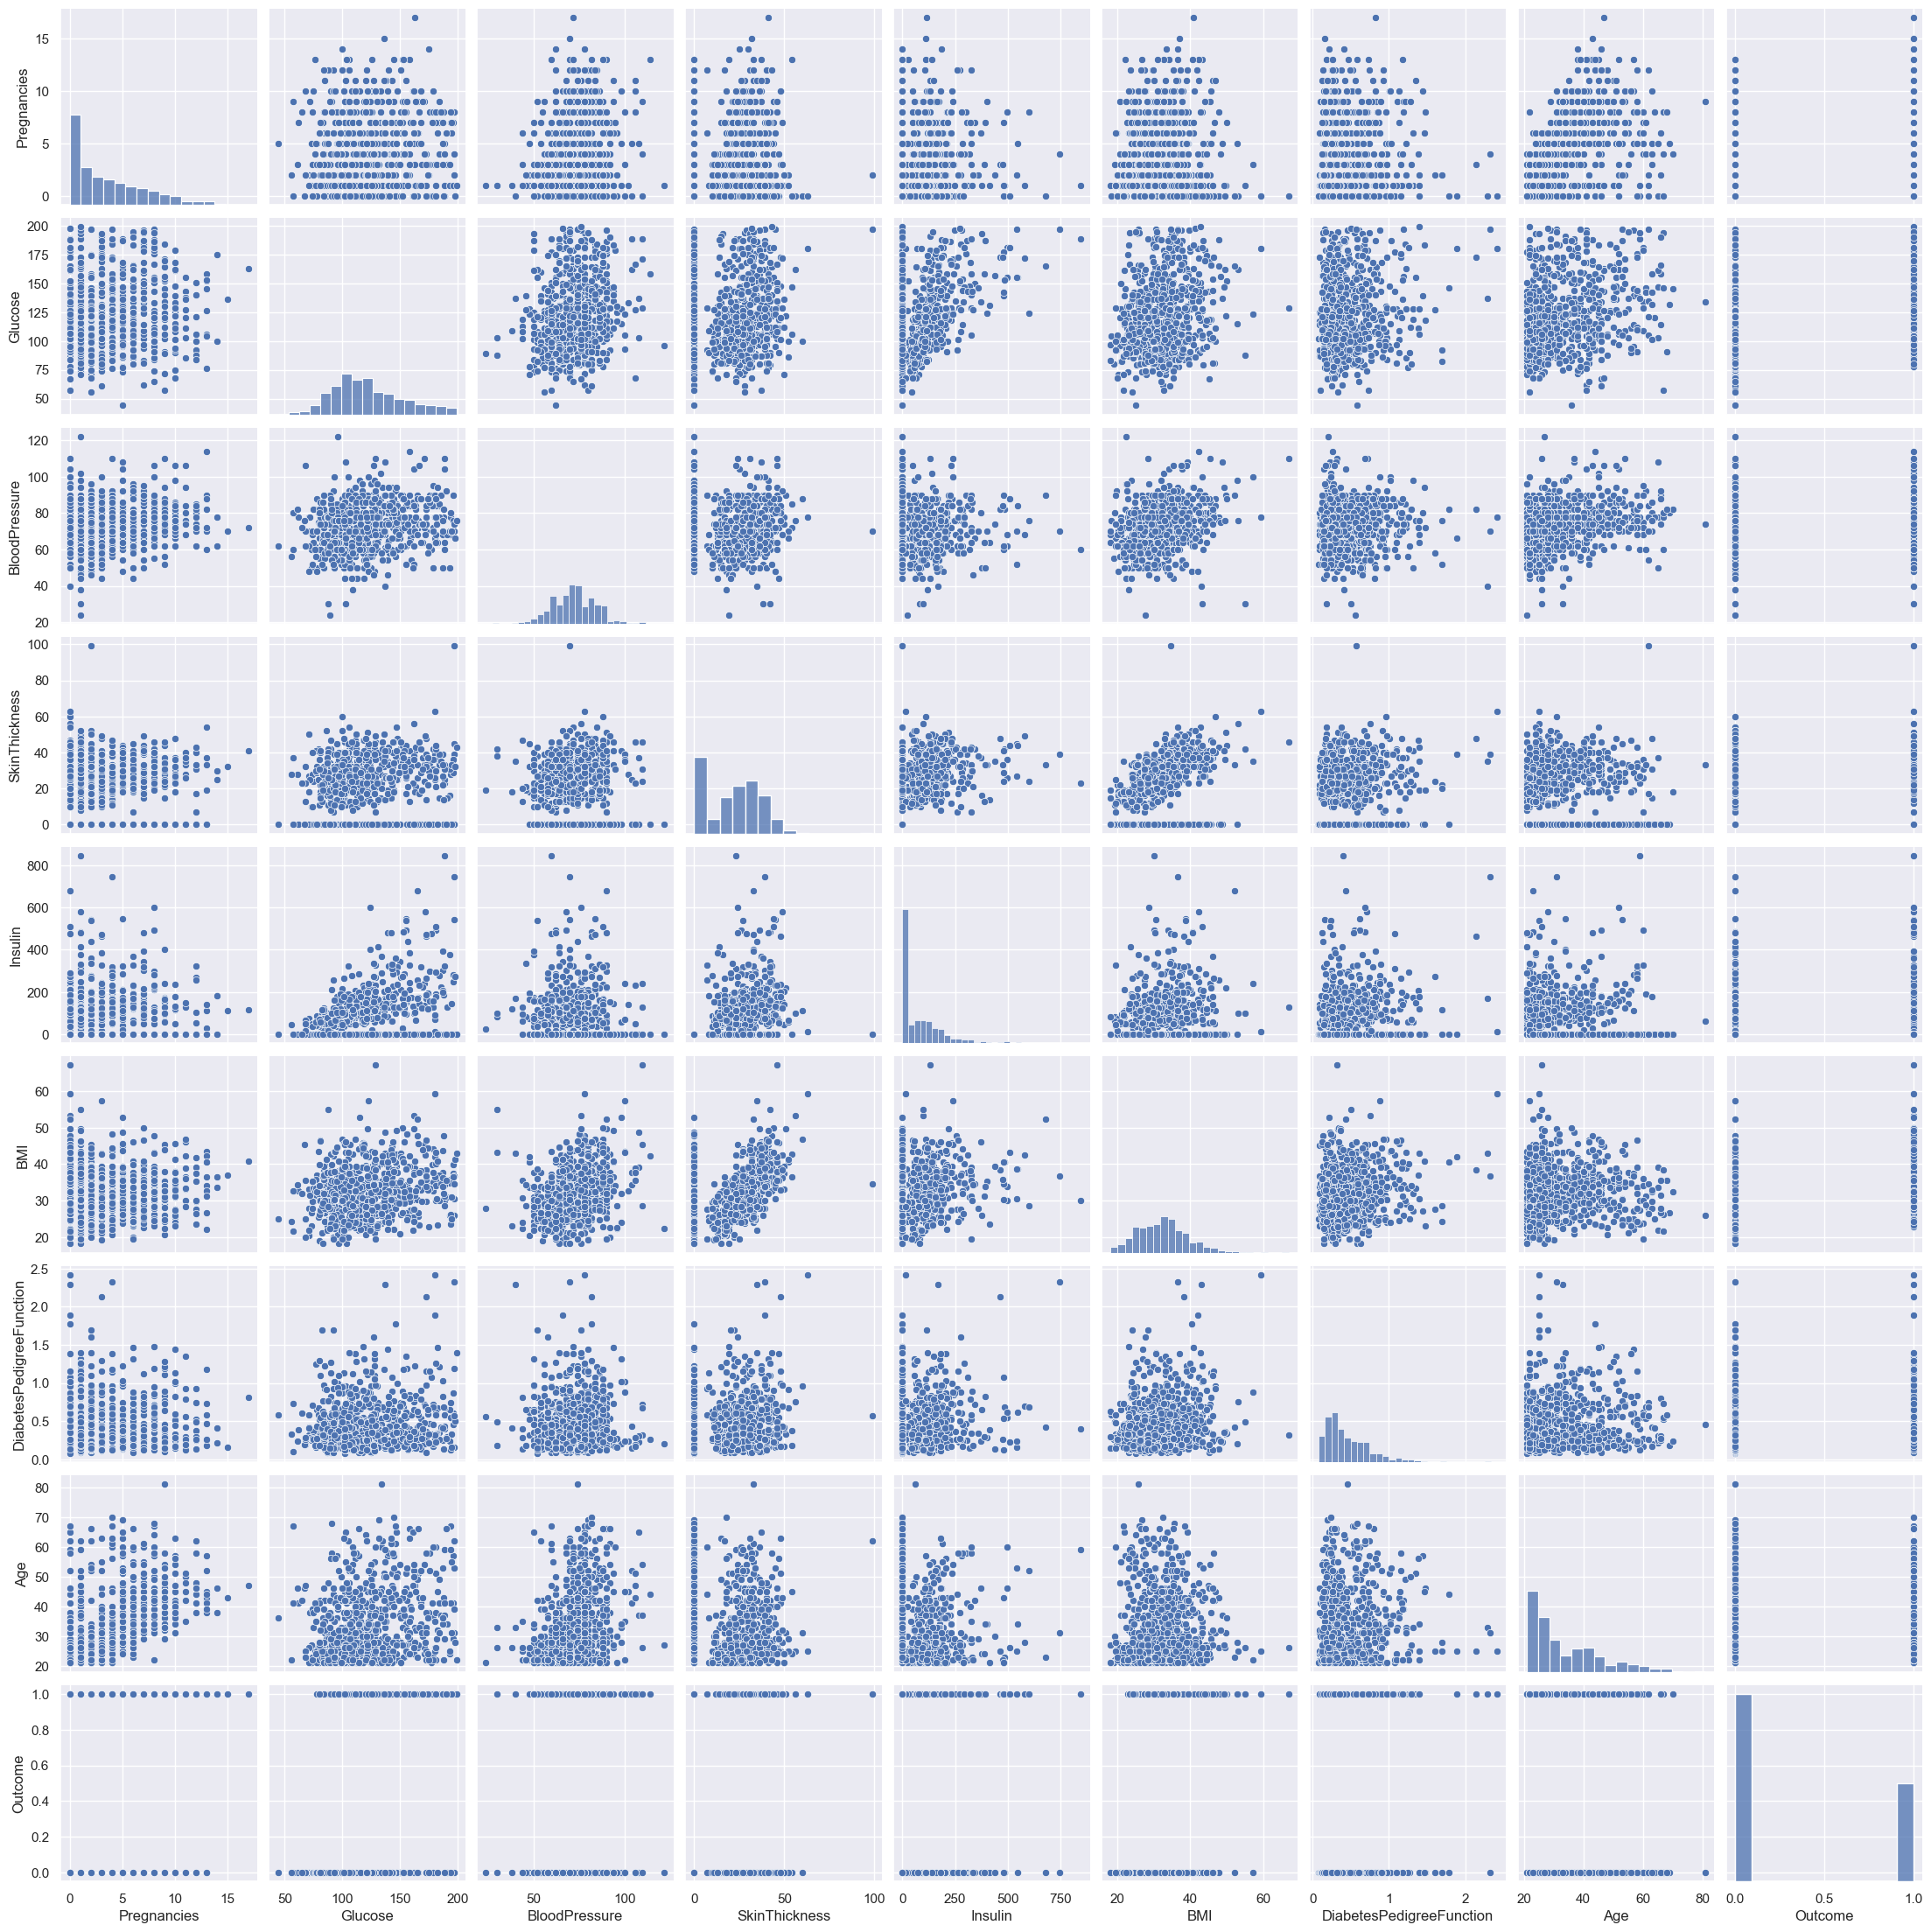

In [14]:
sns.pairplot(data_clean)
plt.show()

In [15]:
### There could be *some* trends in this data, but it is not clear

### General questions to look into before moving on:

##### What is the average age of the individuals in the dataset?
##### What is the average glucose level for individuals with diabetes and without diabetes?
##### What is the average BMI for individuals with diabetes and without diabetes?
##### How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?

In [16]:
#Avg. age
print(data_clean['Age'].mean())
print(data_clean.loc[(data_clean['Outcome']==0)]['Age'].mean())
print(data_clean.loc[(data_clean['Outcome']==1)]['Age'].mean())

33.350828729281766
31.25894736842105
37.34136546184739


In [17]:
#Respondents with diabetes are about 6 years (16%) older than those without

In [18]:
# avg glucose
print(data_clean['Glucose'].mean())
print(data_clean.loc[(data_clean['Outcome']==0)]['Glucose'].mean())
print(data_clean.loc[(data_clean['Outcome']==1)]['Glucose'].mean())

121.88259668508287
111.01684210526315
142.61044176706827


In [19]:
#Glucose is about 33% higher for those with diabetes

In [20]:
# avg BMI
print(data_clean['BMI'].mean())
print(data_clean.loc[(data_clean['Outcome']==0)]['BMI'].mean())
print(data_clean.loc[(data_clean['Outcome']==1)]['BMI'].mean())

32.46712707182321
30.974947368421056
35.3136546184739


In [21]:
#BMI is about 16% higher for those with diabetes

In [22]:
data_clean.loc[(data_clean['Outcome']==0)].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0
mean,3.320000,111.016842,70.907368,20.395789,72.176842,30.974947,0.430297,31.258947,0.0
std,3.030562,25.010709,12.174879,14.724158,100.217139,6.571093,0.295905,11.561535,0.0
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.500000,62.000000,0.000000,0.000000,25.900000,0.232000,23.000000,0.0
50%,2.000000,108.000000,70.000000,22.000000,46.000000,30.400000,0.338000,27.000000,0.0
75%,5.000000,125.500000,78.000000,31.000000,107.000000,35.400000,0.560500,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [23]:
data_clean.loc[(data_clean['Outcome']==1)].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,4.907631,142.610442,75.248996,23.441767,107.991968,35.313655,0.559594,37.341365,1.0
std,3.708575,30.058895,12.291579,17.352768,140.989933,6.589824,0.378925,11.122120,0.0
min,0.000000,78.000000,30.000000,0.000000,0.000000,22.900000,0.088000,21.000000,1.0
25%,2.000000,119.000000,68.000000,0.000000,0.000000,30.900000,0.268000,28.000000,1.0
50%,4.000000,142.000000,74.000000,28.000000,64.000000,34.300000,0.452000,36.000000,1.0
75%,8.000000,168.000000,84.000000,36.000000,175.000000,38.500000,0.732000,45.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [24]:
#Increased # of pregancies could just be a function of age being larger for the positive respondents 

In [25]:
#let's reset the index now, though we may end up dropping further rows
data_clean.reset_index(drop=True, inplace=True)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [26]:
from scipy import stats

In [27]:
data_clean.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.0 KB


In [29]:
data_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
#To reduce outliers as well, lets
#remove all rows with data outside 3*std of mean
X_c = data_clean[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

C:\Users\joshu\AppData\Local\Temp\ipykernel_21784\3398345307.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_c = data_clean[(np.abs(stats.zscore(data)) < 3).all(axis=1)]


In [31]:
X_c.shape

(645, 9)

In [32]:
# This reduced the dataset by quite a few rows (about 10%), 
#we should compare the below description to the description generated before removing outliers:
X_c.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,3.843411,121.855814,72.631008,21.587597,84.812403,32.448837,0.471507,33.460465,0.345736
std,3.386854,30.252190,12.462377,15.687174,117.515324,6.882376,0.319721,11.847782,0.475977
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.247000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,24.000000,48.000000,32.400000,0.382000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,135.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
# The most obvious changes are to Insulin and Age
# Let's look at the count of positives for our target variable
print(len(X_c.loc[X_c['Outcome']==1]))
print(len(X_c.loc[X_c['Outcome']==0]))

223
422


In [34]:
print(len(data_clean.loc[data_clean['Outcome']==1]))
print(len(data_clean.loc[data_clean['Outcome']==0]))

249
475


In [35]:
#The removal out outliers does not seem to have disproportionately removed our positive target variable, but has reduced the dataset further, 
# by about 10% as mentioned above

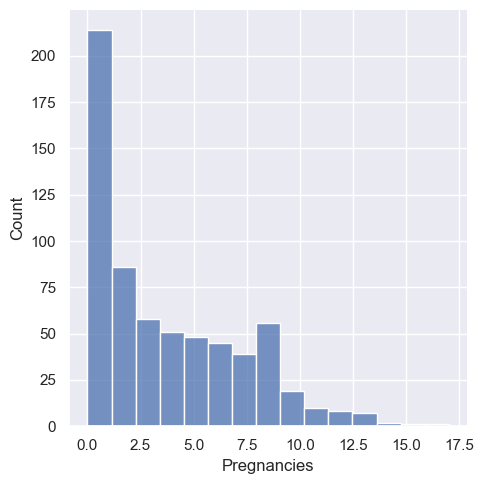

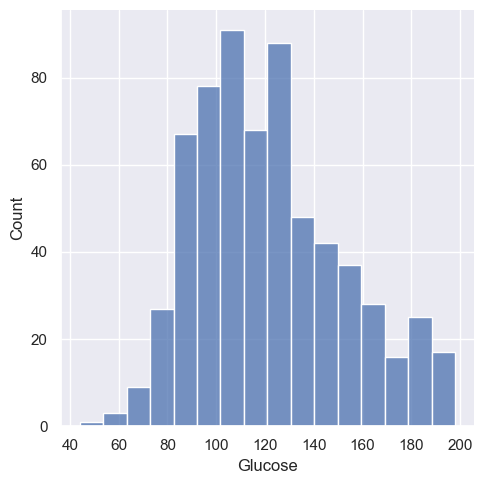

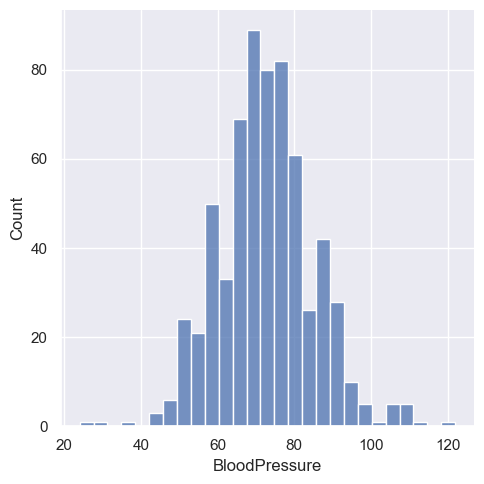

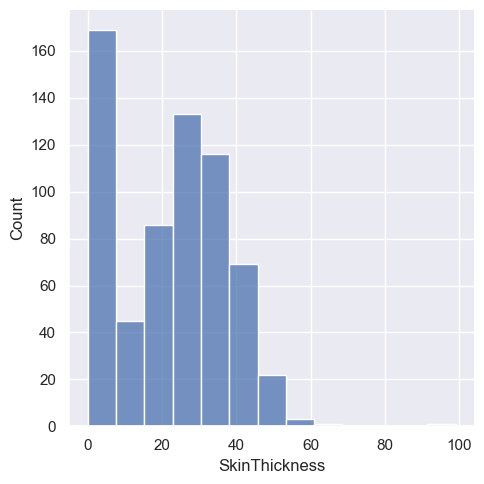

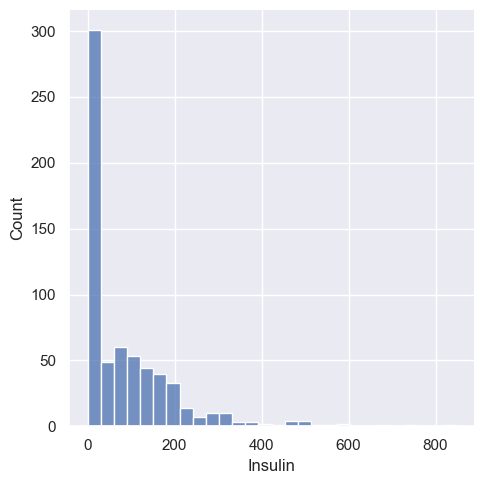

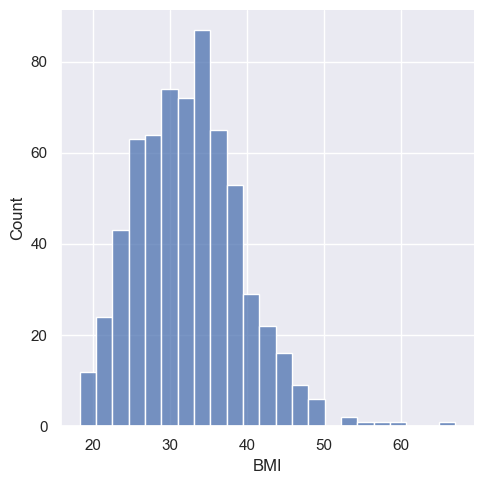

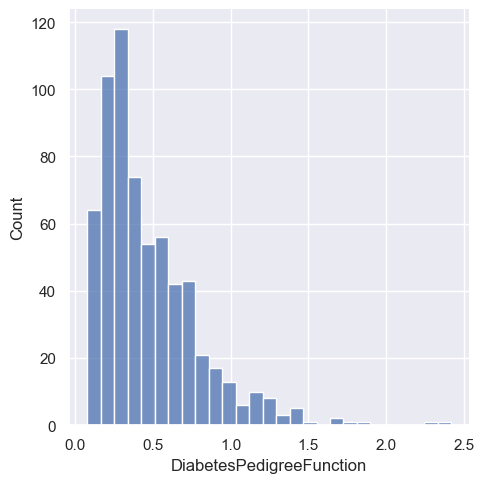

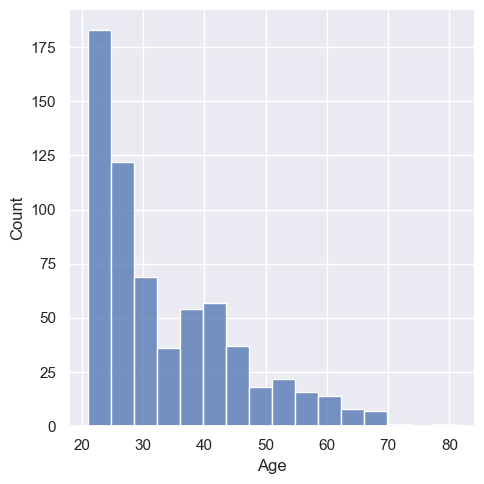

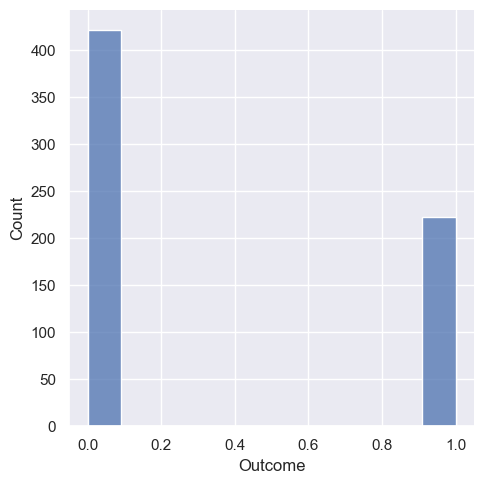

In [36]:
col = X_c.columns
for column in col:
    sns.displot(X_c[column])

In [37]:
# these columns look like they have the most skew still
X_c[['Insulin','SkinThickness']].describe()

,Insulin,SkinThickness
count,645.000000,645.000000
mean,84.812403,21.587597
std,117.515324,15.687174
min,0.000000,0.000000
25%,0.000000,0.000000
50%,48.000000,24.000000
75%,135.000000,33.000000
max,846.000000,99.000000


In [38]:
# #If we do need to scale, the following will do so:

# # Scaling
scaler = StandardScaler()
X_p = X_c.drop('Outcome',axis=1)
y_scaled = X_c['Outcome']
col = X_p.columns

In [39]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_p))

# #rename columns back to originals
X_scaled.columns = col
print(X_scaled.columns)
print(X_scaled.shape)
print(y_scaled.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
(645, 8)
(645,)


In [40]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,-2.478637e-17,2.285855e-16,-1.136042e-16,-8.262125e-18,-7.539189e-17,-3.580254e-17,2.809122e-16,2.024221e-16
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.135683e+00,-2.575557e+00,-3.905254e+00,-1.377198e+00,-7.222737e-01,-2.071944e+00,-1.231736e+00,-1.052529e+00
25%,-8.401948e-01,-7.560957e-01,-6.931026e-01,-1.377198e+00,-7.222737e-01,-7.341586e-01,-7.027404e-01,-7.991207e-01
50%,-2.492181e-01,-1.275546e-01,-5.067231e-02,1.539012e-01,-3.134993e-01,-7.101488e-03,-2.801702e-01,-3.767732e-01
75%,6.372470e-01,6.663921e-01,5.917580e-01,7.280636e-01,4.274042e-01,6.036265e-01,4.867164e-01,6.368607e-01
max,3.887619e+00,2.518934e+00,3.964517e+00,4.938588e+00,6.482375e+00,5.038675e+00,6.099074e+00,4.015640e+00


In [41]:
#These values look very unintuitive and will be difficult to work with, so I would elect not to scale this data.

In [42]:
X = X_c.drop('Outcome',axis=1)
y = X_c['Outcome']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(516, 8)
(516,)
(129, 8)
(129,)


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [45]:
# Let's start with fitting a very basic Logistical Regression model:

In [46]:
from sklearn.linear_model import LogisticRegression
# the metrics below will likely come in handy, let's just import them all now before we forget
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

In [47]:
clf = LogisticRegression(penalty=None) # logistic regression with no penalty term in the cost function.

clf.fit(X_train, y_train)

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [48]:
# WELL! That doesn't look good. Let's try scaling, as suggested by the error.

In [49]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler


StandardScaler()

In [50]:
scaler.mean_

array([  3.79651163, 122.45736434,  72.62209302,  21.50581395,
        85.03100775,  32.34379845,   0.47542442,  33.53488372])

In [51]:
scaler.scale_

array([  3.37444619,  30.23224259,  12.39618191,  15.74635325,
       120.10477906,   6.83574312,   0.32687232,  11.96558146])

In [52]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 2.13471722,  0.51410793,  0.11115576, ...,  0.54949425,
         0.24956405,  1.3760398 ],
       [-0.5323871 , -1.07360095, -0.37286425, ...,  0.85670299,
         0.08436193, -0.54614009],
       [-0.82873203,  1.14257603, -0.05018424, ..., -0.98654943,
        -1.07817149, -0.7968592 ],
       ...,
       [-0.23604218, -0.34590105,  0.11115576, ..., -0.10881018,
        -0.8517834 , -0.71328617],
       [-0.23604218,  0.08410344, -1.17956425, ..., -0.10881018,
        -0.99251113, -0.7968592 ],
       [-0.82873203, -1.13975549, -3.43832426, ...,  3.31437287,
         0.06294684, -0.62971313]])

In [53]:
clf.fit(X_scaled, y_train)

LogisticRegression(penalty=None)

In [54]:
#lack of error = good

In [55]:
#Transforming X_test
X_test = scaler.transform(X_test)

In [56]:
test_prob = clf.predict_proba(X_test)[:,:1]
test_pred = clf.predict(X_test)

In [57]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
# print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
# print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 1.60643

Using 0.5 as threshold:
Accuracy = 0.76744
Precision = 0.67647
Recall = 0.54762
F1 score = 0.60526

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        87
           1       0.68      0.55      0.61        42

    accuracy                           0.77       129
   macro avg       0.74      0.71      0.72       129
weighted avg       0.76      0.77      0.76       129



In [58]:
#These results seem... okay. Decent precision, recall and f1 for our negatives, but poor results for positive cases (meaning few False Positives, many more False Negatives)

In [59]:
roc_auc_score(y_test, test_prob)

0.1781609195402299

In [60]:
from sklearn.model_selection import GridSearchCV
grid={"C":[.001,.01,.1,1,5,10,20,50], "solver":["lbfgs","liblinear","saga"]}# l1 lasso l2 ridge
lr=LogisticRegression() #renamed to avoid overwriting or confusing with the unpenalized model
lr_cv=GridSearchCV(lr,grid,cv=5)
lr_cv.fit(X_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50],
                         'solver': ['lbfgs', 'liblinear', 'saga']})

In [61]:
print(lr_cv.best_params_)
print(lr_cv.best_score_)

{'C': 0.1, 'solver': 'lbfgs'}
0.7616131441374161


In [62]:
#Not a big improvement, but let's run the full slate

In [63]:
best_lr=LogisticRegression(C=.1,solver='lbfgs')
best_lr.fit(X_scaled,y_train)

LogisticRegression(C=0.1)

In [64]:
test_prob = best_lr.predict_proba(X_test)[:,:1]
test_pred = best_lr.predict(X_test)

In [65]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
# print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
# print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 1.48008

Using 0.5 as threshold:
Accuracy = 0.78295
Precision = 0.71875
Recall = 0.54762
F1 score = 0.62162

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        87
           1       0.72      0.55      0.62        42

    accuracy                           0.78       129
   macro avg       0.76      0.72      0.73       129
weighted avg       0.78      0.78      0.77       129



In [66]:
#very slight improvement, rather negligable though.

In [67]:
# For a little more clarity, some confusion matrices

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [69]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[78,  9],
       [19, 23]], dtype=int64)

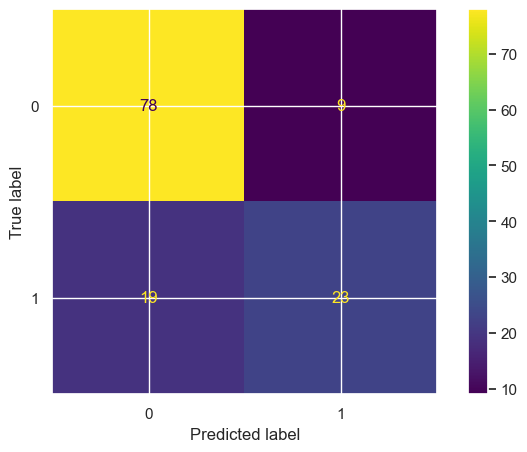

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)

In [71]:
#Let's try random forrest instead
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [72]:
rfc.fit(X_scaled,y_train)

RandomForestClassifier()

In [73]:
rfc_y_pred = rfc.predict(X_test)
rfc_test_prob = rfc.predict_proba(X_test)[:,:1]

In [74]:
print('Log loss = {:.5f}'.format(log_loss(y_test, rfc_test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, rfc_test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, rfc_test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, rfc_y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, rfc_y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, rfc_y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, rfc_y_pred)))

print('\nClassification Report')
print(classification_report(y_test, rfc_y_pred))

Log loss = 1.80407
AUC = 0.20265
Average Precision = 0.21726

Using 0.5 as threshold:
Accuracy = 0.79070
Precision = 0.69231
Recall = 0.64286
F1 score = 0.66667

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        87
           1       0.69      0.64      0.67        42

    accuracy                           0.79       129
   macro avg       0.76      0.75      0.76       129
weighted avg       0.79      0.79      0.79       129



In [75]:
cm = confusion_matrix(y_test,rfc_y_pred)
cm

array([[75, 12],
       [15, 27]], dtype=int64)

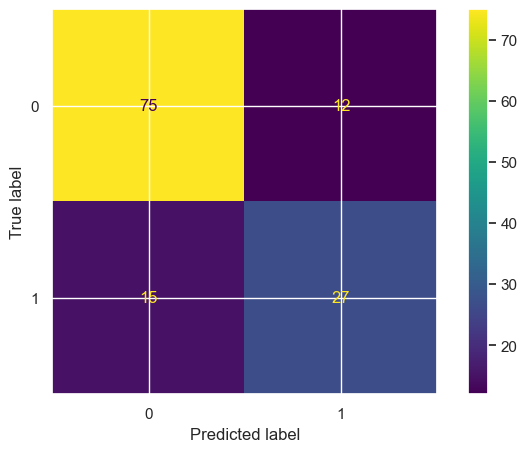

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,rfc_y_pred)

In [77]:
# About the same as the unpenalized log. reg.

#Grid search? I guess...

In [78]:
param_grid = {'n_estimators':[10,50,100,500,1000],'max_depth':[1,3,5,6,7,8]}

In [79]:
rf_gs = GridSearchCV(rfc, param_grid, cv=5,n_jobs=-1)

In [80]:
rf_gs_result = rf_gs.fit(X_train,y_train)

In [81]:
print(f"It looks like the best RF score is: {rf_gs_result.best_score_}")
print(f"and the best parameters for RF are: {rf_gs_result.best_params_}")

It looks like the best RF score is: 0.7731702763256162
and the best parameters for RF are: {'max_depth': 6, 'n_estimators': 500}


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

## Findings

##### Given the high number of zero values (which can be read as nulls, given how unlikely it is for someone to have a lack of Glucose, blood pressure, skin thickness, insulin or body mass index), the sampling should be re-done before taking any of the results of this analysis seriously. 

##### That said, with the data in its current state, the primary thing that can be said is that there is no strong indication of direct correlation between any one variable and the target (incidence of diabetes), however by taking them together we can provide a reasonably predictive model.

##### The two models applied here yielded similar results, so adding a third or ideally performing a more complete ML process involving aggregating many weak models should be attempted.

##### Given more time, narrowing down which variables are strong predictors and which might be introducing noise should be taken as the first next step.
